Aug 23

a test on MCMC functions. follow emcee guideline

In [87]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

In [88]:
import astropy.io.fits as fits

In [89]:
#load data 
data = fits.getdata('/data/lemn/results/NGC_Magz.fits')

In [90]:
N_GC = data['NGCs']
a = np.flatnonzero(N_GC != 0)

In [91]:
N_GC = data[a]['NGCs']
Mag_z = data[a]['Mag z']
err_GC = data[a]['err GC']

In [92]:
logn = np.log10(N_GC)
logerr = np.log10(err_GC)

Text(0.5, 0, 'Mag z')

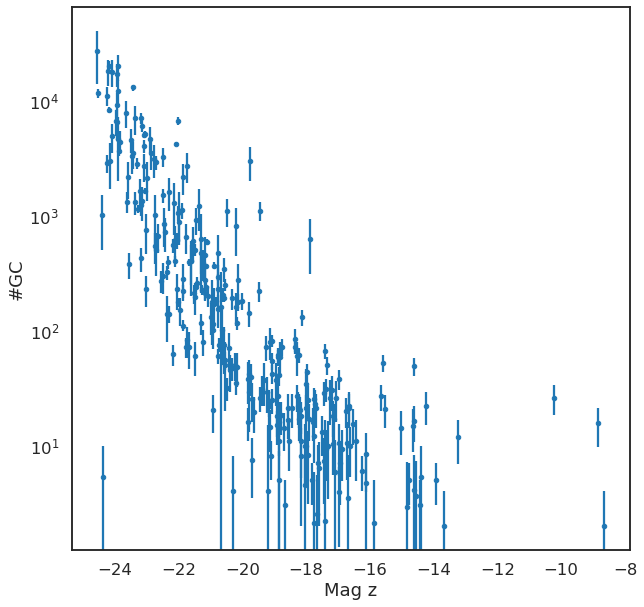

In [104]:
plt.figure(figsize=(10,10))
plt.errorbar(Mag_z, N_GC, yerr=err_GC, fmt=".", capsize=0)
plt.ylabel("#GC")
plt.yscale('log')
plt.xlabel("Mag z")

In [132]:
def log_likelihood(theta, x, y, yerr):
    a, alpha, b, beta, Norm, M1, log_f = theta 
    model = Norm*(a*(x/M1)**alpha + b*(x/M1)**beta)+ model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [127]:
def log_prior(theta):
    a, b, alpha, beta, M1, Norm, log_f = para 
    if 0 < a < 0.5 and 1<alpha<15 and 0 < b < 1  and 0<beta<0.01 and 1<Norm<10 and -26<M1<-22 and -10 < log_f < 10:
        return 0.0
    return -np.inf


In [128]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [134]:
# Choose the initial parameters.
a_ini     = 0.2
alpha_ini = 0.9
b_ini     = 0.4
beta_ini  = 0.02
Norm_ini  = 2
M1_ini    = -23
f_ini     = 0.534

In [136]:
data     = (Mag_z, N_GC, err_GC)
nwalkers = 500
niter    = 1500
initial = np.array([a_ini, alpha_ini, b_ini, beta_ini, Norm_ini, M1_ini, np.log(f_ini)])# initial set of values of the parameters (guess)
ndim     = len(initial)

#stepping from one place to the next, generate N-dimensional parameters space close to the current location
p0       = [np.array(initial) + 1e-7*np.random.randn(ndim) for i in range(nwalkers)]

In [137]:
def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [139]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,log_probability,data)

Running burn-in...
emcee: Exception while calling your likelihood function:
  params: [ 2.00000077e-01  8.99999953e-01  4.00000054e-01  1.99999537e-02
  1.99999995e+00 -2.30000000e+01 -6.27359631e-01]
  args: (array([-21.95063722, -13.93582153, -22.0424648 , -23.44855033,
       -23.20400012, -22.70515855, -22.64287224, -16.23133425,
       -22.35073654, -22.1034142 , -21.50075839, -23.86932083,
       -20.87903342, -22.03925486, -17.81180771, -17.78682978,
       -24.39988594, -19.1612733 , -19.32883984, -22.72672859,
       -18.00157466, -20.14222251, -18.93428757, -20.75868738,
       -21.86428846, -18.85917491, -21.17368357, -18.5648376 ,
       -18.20594599, -17.99900379, -18.92627346, -17.61309168,
       -17.91899405, -17.94890248, -21.13021381, -18.02244427,
       -21.48524343, -19.81146486, -21.26473265, -23.17813523,
       -21.67049449, -16.62152291, -20.4205446 , -18.81636399,
       -21.66468735,          nan, -20.15845555, -17.2012681 ,
       -18.23062446, -23.13997285,

Traceback (most recent call last):
  File "/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/tmp/ipykernel_68567/3971492525.py", line 2, in log_probability
    lp = log_prior(theta)
  File "/tmp/ipykernel_68567/1626655301.py", line 2, in log_prior
    a, b, alpha, beta, M1, Norm, log_f = para
NameError: name 'para' is not defined


NameError: name 'para' is not defined